<a href="https://colab.research.google.com/github/riteshchail/oibsip_taskno.4/blob/main/Emailspam_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/spam.csv",encoding="ISO-8859-1")
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [ ]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3173,ham,It vl bcum more difficult..,NaN,NaN,NaN
1107,ham,From someone not to smoke when every time I've...,NaN,NaN,NaN
4961,ham,Yup ok...,NaN,NaN,NaN
4779,ham,Sen told that he is going to join his uncle fi...,NaN,NaN,NaN
2468,ham,Lol well don't do it without me. We could have...,NaN,NaN,NaN


Data Cleaning

In [ ]:
df.shape

(5572, 5)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [ ]:
df.drop(["Unnamed: 2","Unnamed: 3","Unnamed: 4"],axis=1,inplace=True )


In [ ]:
df.rename({"v1":"target","v2":"text"},axis=1,inplace= True)
df.head()

,target,text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df['target'] = encoder.fit_transform(df['target'])
df.sample(4)

,target,text
382,0,Hey leave it. not a big deal:-) take care.
2462,0,"Rose needs water, season needs change, poet ne..."
5240,0,"Gud gud..k, chikku tke care.. sleep well gud nyt"
3701,0,Hey loverboy! I love you !! I had to tell ... ...


In [ ]:
df.isnull().sum()

target    0
text      0
dtype: int64

In [ ]:
df.drop_duplicates(keep="first")

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


EDA

In [ ]:
df["target"].value_counts()

0    4825
1     747
Name: target, dtype: int64

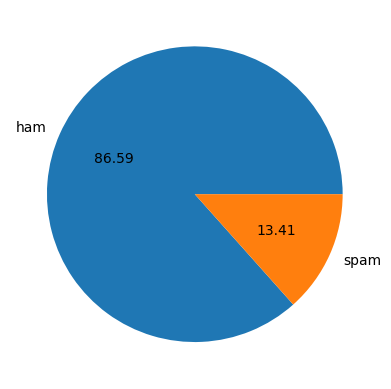

In [ ]:
plt.pie(df["target"].value_counts(),labels=["ham","spam"],autopct="%0.2f")
plt.show()

In [ ]:
 import nltk
 ! pip install nltk
 nltk.download('punkt')

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
df["num_character"] =df["text"].apply(len)
df.head()

,target,text,num_character
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [ ]:
df["num_words"]= df["text"].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()

,target,text,num_character,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [ ]:
df["num_sentence"] = df["text"].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,target,text,num_character,num_words,num_sentence
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [ ]:
df[["num_character","num_words","num_sentence"]].describe()

,num_character,num_words,num_sentence
count,5572.000000,5572.000000,5572.000000
mean,80.118808,18.699390,1.996411
std,59.690841,13.741932,1.520159
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.500000
75%,121.000000,27.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df["target"]==0] [["num_character","num_words","num_sentence"]].describe()

,num_character,num_words,num_sentence
count,4825.000000,4825.000000,4825.000000
mean,71.023627,17.276269,1.837720
std,58.016023,13.988585,1.454388
min,2.000000,1.000000,1.000000
25%,33.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,92.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [ ]:
df[df["target"]==1] [["num_character","num_words","num_sentence"]].describe()

,num_character,num_words,num_sentence
count,747.000000,747.000000,747.000000
mean,138.866131,27.891566,3.021419
std,29.183082,6.867007,1.537580
min,13.000000,2.000000,1.000000
25%,132.500000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


<Axes: xlabel='num_character', ylabel='Count'>

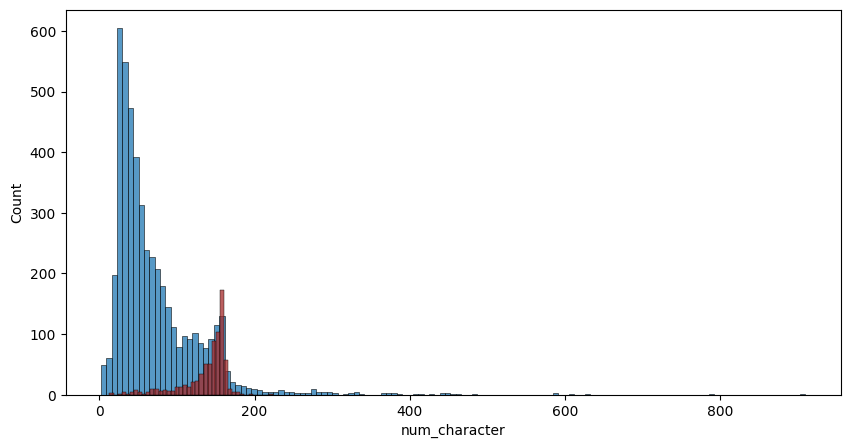

In [ ]:
plt.figure(figsize= (10,5))
sns.histplot(df[df["target"]==0] ["num_character"])
sns.histplot(df[df["target"]==1] ["num_character"],color="brown")

<Axes: xlabel='num_words', ylabel='Count'>

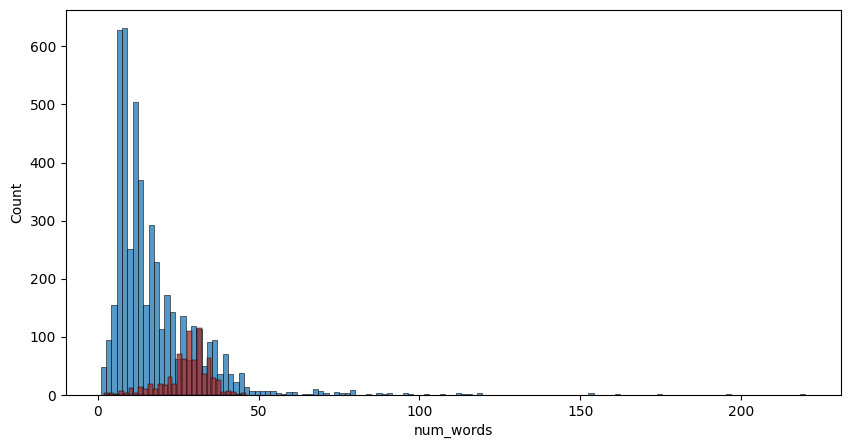

In [ ]:
plt.figure(figsize= (10,5))
sns.histplot(df[df["target"]==0] ["num_words"])
sns.histplot(df[df["target"]==1] ["num_words"],color="brown")

<Axes: xlabel='num_sentence', ylabel='Count'>

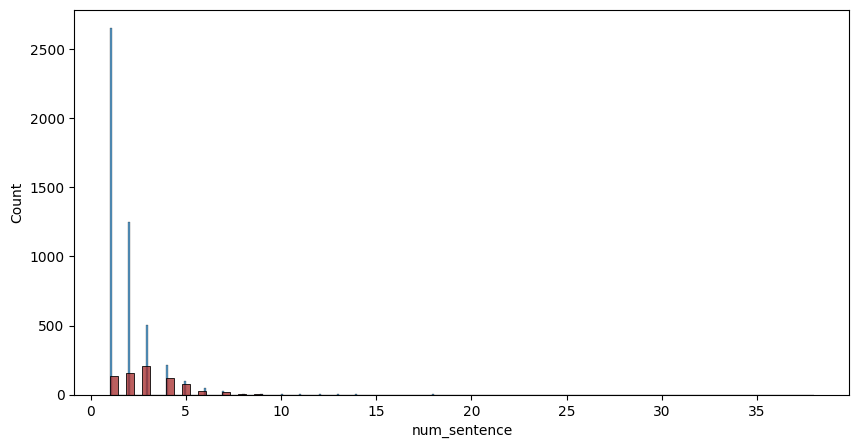

In [ ]:
plt.figure(figsize= (10,5))
sns.histplot(df[df["target"]==0] ["num_sentence"])
sns.histplot(df[df["target"]==1] ["num_sentence"],color="brown")

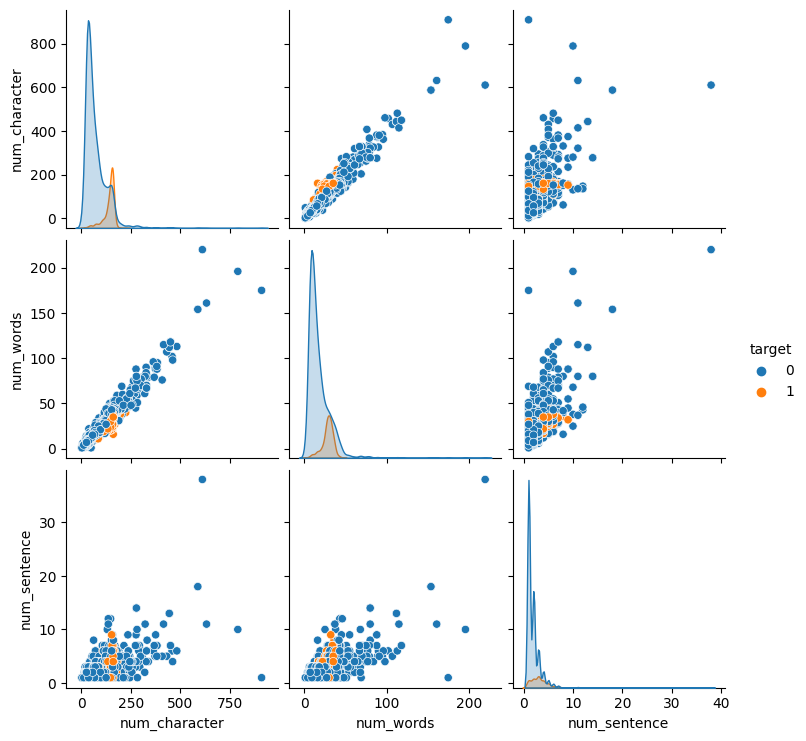

In [ ]:
sns.pairplot(df,hue="target")

<ipython-input-26-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

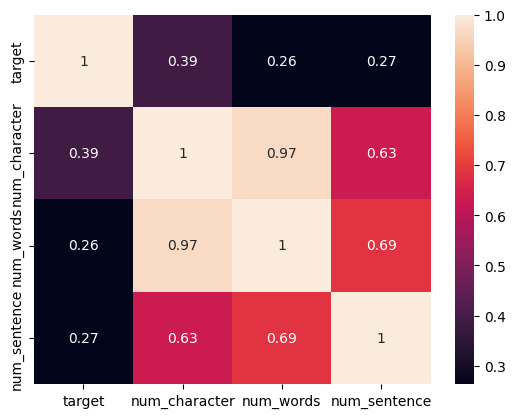

In [ ]:
sns.heatmap(df.corr(),annot=True)


Data Preprocessing

In [ ]:
def transform_text(text):
  text = text.lower()
  text = nltk.word_tokenize(text)

  y = []
  for i in text:
     if i.isalnum():
      y.append(i)

  text =y[:]
  y.clear()
  for i in text:
     if i not in stopwords.words("english") and i not in string.punctuation:
      y.append(i)

  text = y[:]
  y.clear()

  for i in text:
    y.append(ps.stem(i))
  return " ".join(y)


In [ ]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [ ]:
from nltk.corpus import stopwords
nltk.download("stopwords")
stopwords.words("english")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
df["transformed_text"] = df["text"].apply(transform_text)
df.head()

,target,text,num_character,num_words,num_sentence,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [ ]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color="white")

In [ ]:
spam_wc = wc.generate(df[df["target"]==1]["transformed_text"].str.cat(sep=" "))

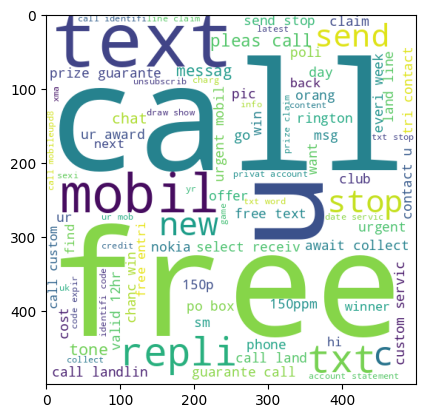

In [ ]:
plt.figure()
plt.imshow(spam_wc)

In [ ]:
ham_wc = wc.generate(df[df["target"]==0]["transformed_text"].str.cat(sep=" "))

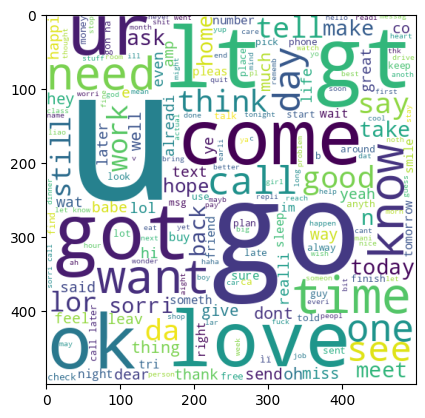

In [ ]:
plt.figure()
plt.imshow(ham_wc)

Model Selection

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer(max_features=20)
tfidf =TfidfVectorizer()

In [ ]:
X= cv.fit_transform(df["transformed_text"]).toarray()
X.shape

(5572, 20)

In [ ]:
Y = df["target"].values
Y

array([0, 0, 1, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2,random_state=2)

In [ ]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix,precision_score

In [ ]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [ ]:
gnb.fit(X_train,Y_train)
Y_pred1= gnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred1))
print(confusion_matrix(Y_test,Y_pred1))
print(precision_score(Y_test,Y_pred1))

0.357847533632287
[[249 708]
 [  8 150]]
0.17482517482517482


In [ ]:
mnb.fit(X_train,Y_train)
Y_pred2= mnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred2))
print(confusion_matrix(Y_test,Y_pred2))
print(precision_score(Y_test,Y_pred2))

0.8923766816143498
[[945  12]
 [108  50]]
0.8064516129032258


In [ ]:
bnb.fit(X_train,Y_train)
Y_pred3= bnb.predict(X_test)
print(accuracy_score(Y_test,Y_pred3))
print(confusion_matrix(Y_test,Y_pred3))
print(precision_score(Y_test,Y_pred3))

0.8905829596412556
[[944  13]
 [109  49]]
0.7903225806451613


Prediction

In [ ]:
input_mail =["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"]
input_data_features = cv.fit_transform(input_mail).toarray()
prediction = gnb.predict(input_data_features)
print(prediction)
if(prediction[0]==1):
  print("ham mail")
else:
  print("spam mail")

[0]
spam mail
